In [1]:
from modules.client import OffVarianceClient
import modules.utils as utils
from dotenv import dotenv_values

config = dotenv_values('../.env')

client = OffVarianceClient(config.get('OFF_VARIANCE_KEY'), data_path='../data')
games_df = client.get_finished_games()

games_df = utils.filter_correct_games(games_df)
utils.populate_metrics(games_df)

In [4]:
segmented_df = games_df.loc[
(games_df['team1_home_classic_minutes'] >= 90 * 3) & (games_df['team2_away_classic_minutes'] >= 90 * 3) &
(games_df['odds_open_win1'] >= 1.8) & (games_df['odds_open_win1'] <= 2.8) &
(games_df['odds_open_tm25'] >= 2.0) & (games_df['odds_open_tm25'] <= 2.5)
]

Count: 5409
Open profit: -167.53000000000006
Close profit: -159.69000000000005
Open ROI: -0.03097245331854318
Close ROI: -0.02952301719356629
UDI: -0.0016167914041147393
AxesSubplot(0.125,0.125;0.775x0.755)


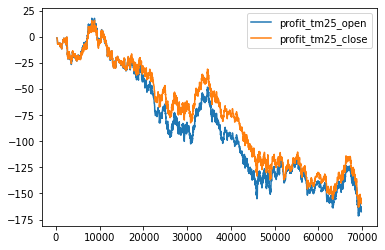

In [5]:
utils.print_total_under_result(segmented_df)

In [6]:
utils.analyze_correlation(segmented_df, 'total', utils.metrics)

,correlation
expected_total,0.081614
expected_total_loc,0.074952
simple_expected_total_value_loc,0.067021
simple_expected_total_value,0.063586
expected_difference,0.024054
expected_difference_loc,0.022083
simple_expected_difference_loc,0.020684
simple_expected_difference,-0.000627


In [7]:
utils.analyze_avg_udi(segmented_df, utils.metrics, 'udi_tm25')

,low,high,diff
expected_total_loc,2.827422,2.437566,0.389856
expected_total,2.775059,2.397319,0.377740
simple_expected_total_value,5.460067,5.120344,0.339724
simple_expected_total_value_loc,5.464548,5.174187,0.290361
expected_difference,0.269842,0.209055,0.060787
expected_difference_loc,0.292859,0.234347,0.058512
simple_expected_difference_loc,0.271813,0.235625,0.036188
simple_expected_difference,0.007157,0.020078,0.012921


In [8]:
updated_segmented_df = segmented_df.loc[
(segmented_df['expected_total'] <= 2.39) & (segmented_df['expected_total_loc'] <= 2.43)
]

utils.analyze_avg_udi(updated_segmented_df, [
    'expected_total',
    'expected_total_loc',
], 'udi_tm25')

,low,high,diff
expected_total,2.145955,2.036313,0.109643
expected_total_loc,1.975655,1.910928,0.064727


Count: 201
Open profit: 33.379999999999995
Close profit: 18.229999999999997
Open ROI: 0.1660696517412935
Close ROI: 0.0906965174129353
UDI: 0.07463107247953175
AxesSubplot(0.125,0.125;0.775x0.755)


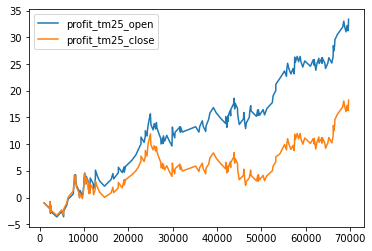

In [9]:
filtered_result_df = segmented_df.loc[
(segmented_df['expected_total'] <= 2.03) & (segmented_df['expected_total_loc'] <= 1.91)
]
utils.print_total_under_result(filtered_result_df)